<a href="https://colab.research.google.com/github/Armifara/Deep-Learning/blob/main/3_Multiclass_Classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification with keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Data Ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Target Feature - Weather Type

In [4]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

# Step 2 - Basic Data Quality Checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.shape

(13200, 11)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Missing Values
m = df.isna().sum()
m

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


# Step 3 - Separate X & Y (Target Feature --> Weather Type)

In [9]:
X = df.drop(columns = ["Weather Type"])
Y = df["Weather Type"]

In [10]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [11]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


# Step 4 - Preprocessing on X

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 1.0+ MB


In [13]:
X.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [14]:
cat_cols = list(X.columns[X.dtypes == "object"])
cat_cols

['Cloud Cover', 'Season', 'Location']

In [15]:
num_cols = list(X.columns[X.dtypes != "object"])
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [18]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [19]:
pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
]).set_output(transform="pandas")

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Step 5 - Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [22]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [24]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [25]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [26]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((10560, 15), (2640, 15), (10560,), (2640,))

### For neural networks you have to one hot encode the y data

In [27]:
# pd.get_dummies is a pandas function used for one-hot encoding.
# It converts categorical variables into dummy or indicator variables.
# In this case, it's used on the target variable ytrain because neural networks typically require numerical input,
# and one-hot encoding is a common way to represent categorical outputs for multiclass classification problems.
# Each unique category in ytrain (e.g., 'Rainy', 'Cloudy', 'Sunny', 'Snowy') will become a new column, with a 1 indicating the presence of that category and 0 otherwise.

ytrain_pre = pd.get_dummies(ytrain, dtype=int)
ytrain_pre.head()

,Cloudy,Rainy,Snowy,Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [28]:
ytest_pre = pd.get_dummies(ytest, dtype=int)
ytest_pre.head()

,Cloudy,Rainy,Snowy,Sunny
4111,0,0,0,1
10607,0,0,0,1
7372,0,0,0,1
11786,0,0,1,0
12227,0,0,0,1


# Step 6 - Build the Neural Network

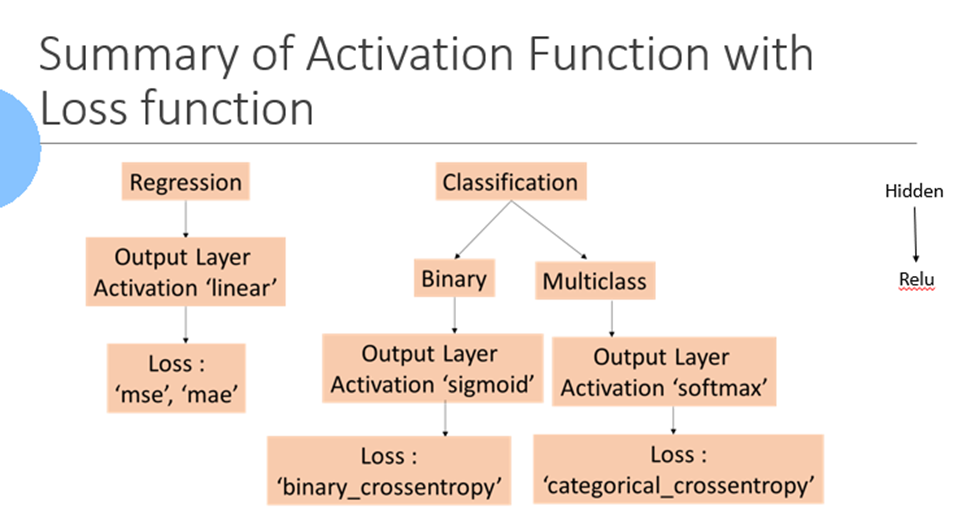

In [29]:
xtrain.shape[1]

15

In [30]:
ytrain_pre.shape[1]

4

In [31]:
# from tensorflow.keras.models import Sequential: Sequential is a type of Keras model that allows you to build neural networks layer by layer in a linear stack.
  # It's suitable for simple models where the data flows sequentially from one layer to the next.

# from tensorflow.keras.layers import Input, Dropout, Dense: These are different types of layers you can add to a Keras model:
  # Input: This layer is used to define the input shape of your model. It's typically the first layer in a non-sequential model or when you need to specify the input shape explicitly.
  # Dropout: This is a regularization technique where a random fraction of the neurons in a layer are ignored during training. This helps prevent overfitting.
  # Dense: This is a standard fully connected neural network layer. Each neuron in a Dense layer is connected to every neuron in the previous layer.

# from tensorflow.keras.callbacks import EarlyStopping: EarlyStopping is a callback function that can be used during model training.
  # It monitors a specified metric (e.g., validation loss) and stops the training process early if the metric stops improving after a certain number of epochs. This helps prevent overfitting and saves training time.

# from tensorflow.keras.regularizers import l2: Regularizers are used to prevent overfitting by adding a penalty to the loss function based on the magnitude of the model's weights.
  # l2 regularization (also known as weight decay) adds a penalty proportional to the square of the weights.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [32]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(16, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(ytrain_pre.shape[1], activation="softmax")
    ]
)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,108 (4.33 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# After Building the Model, it has to be compiled as well
model.compile(
    # Best Optimizer is adam, can be used for all models
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [35]:
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [36]:
hist = model.fit(
    xtrain, ytrain_pre, validation_split=0.2, epochs=100, callbacks=[es]
)

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5082 - loss: 1.2060 - val_accuracy: 0.8565 - val_loss: 0.5969
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7877 - loss: 0.6810 - val_accuracy: 0.8717 - val_loss: 0.4363
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8279 - loss: 0.5542 - val_accuracy: 0.8826 - val_loss: 0.3773
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.4607 - val_accuracy: 0.8935 - val_loss: 0.3420
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.4482 - val_accuracy: 0.8982 - val_loss: 0.3243
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.4173 - val_accuracy: 0.8977 - val_loss: 0.3116
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8726 - loss: 0.3985 - val_accuracy: 0.9010 - val_loss: 0.3023
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8793 - loss: 0.3757 - val_accu

### Plot the Learning Curve

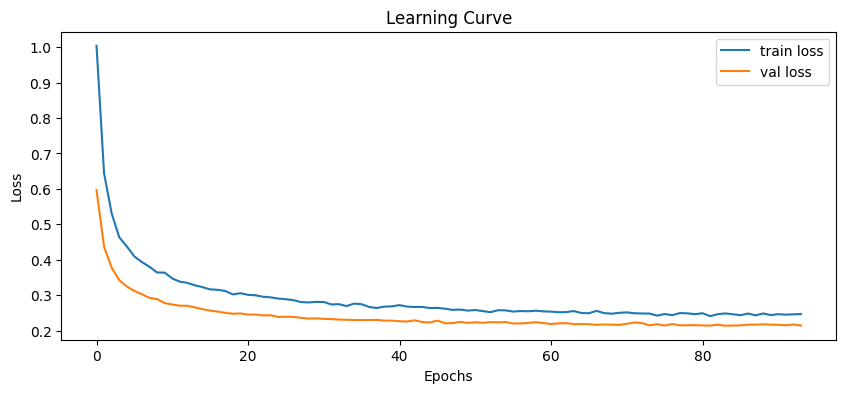

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(hist.history["loss"], label="train loss")
plt.plot(hist.history["val_loss"], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Step 7 - Model Evaluation

In [38]:
model.evaluate(xtrain, ytrain_pre)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9127 - loss: 0.2094


[0.20880304276943207, 0.9164772629737854]

In [39]:
model.evaluate(xtest, ytest_pre)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8985 - loss: 0.2376


[0.23294885456562042, 0.8996211886405945]

In [40]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[6.0603142e-02, 9.3018043e-01, 1.6512026e-03, 7.5652204e-03],
       [5.1627131e-03, 9.9407470e-01, 5.6461908e-04, 1.9791716e-04],
       [5.8726302e-05, 6.0951072e-07, 3.0827905e-05, 9.9990988e-01],
       [2.6482120e-02, 9.7108287e-01, 9.2382764e-04, 1.5111213e-03],
       [9.9979019e-01, 1.8979819e-05, 2.9770707e-05, 1.6100155e-04]],
      dtype=float32)

In [41]:
class_names = list(ytrain_pre.columns)
class_names

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [43]:
# argmax is a function that returns the index of the maximum value along a specified axis.
  # In the context of np.argmax(yprob_train, axis=1) is used to find the index of the highest probability for each prediction in yprob_train.
  # Since yprob_train contains the predicted probabilities for each weather type, finding the index of the maximum probability tells us which weather type the model predicted for each sample.
  # These indices correspond to the columns of the one-hot encoded target variable ytrain_pre, which represent the different weather types ('Cloudy', 'Rainy', 'Snowy', 'Sunny').

import numpy as np
train_idx = np.argmax(yprob_train, axis=1)
train_idx[0:5]

array([1, 1, 3, 1, 0])

In [44]:
ypred_train = [class_names[i] for i in train_idx]
ypred_train[0:5]

['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [45]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [46]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[2.7893715e-05, 1.7995319e-07, 1.9570414e-05, 9.9995232e-01],
       [8.9665758e-04, 7.5843993e-05, 8.3079212e-05, 9.9894446e-01],
       [3.0482954e-03, 1.6165963e-04, 1.0750162e-03, 9.9571496e-01],
       [5.4886439e-08, 2.8000093e-06, 9.9999702e-01, 1.3844570e-07],
       [1.5066653e-01, 7.5342610e-02, 2.4650034e-02, 7.4934077e-01]],
      dtype=float32)

In [47]:
test_idx = np.argmax(yprob_test, axis=1)
test_idx[0:5]

array([3, 3, 3, 2, 3])

In [48]:
ypred_test = [class_names[i] for i in test_idx]
ypred_test[0:5]

['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

In [49]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


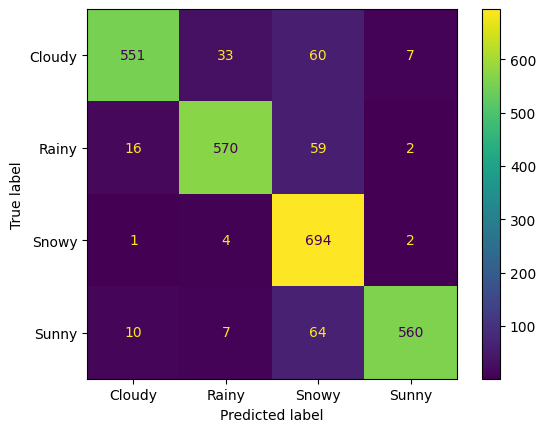

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.95      0.85      0.90       651
       Rainy       0.93      0.88      0.90       647
       Snowy       0.79      0.99      0.88       701
       Sunny       0.98      0.87      0.92       641

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.90      2640



### From above results it is clear that model can be used for out of sample prediction

In [52]:
def predict_reslts(model, class_names, xnew):
  yprob = model.predict(xnew)
  yidx = np.argmax(yprob, axis=1)
  ypred = [class_names[i] for i in yidx]
  return ypred

# Step 8 - Out of Sample Prediction

In [53]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv


In [54]:
xnew = pd.read_csv(url2)
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [55]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [56]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [57]:
probs = model.predict(xnew_pre)
probs[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[1.9316192e-06, 8.2086772e-05, 9.9991250e-01, 3.4786990e-06],
       [1.5880719e-02, 5.2572610e-03, 6.3508027e-04, 9.7822690e-01],
       [9.9045056e-01, 3.6615054e-03, 6.3736254e-04, 5.2505927e-03],
       [9.1434298e-03, 9.8970842e-01, 6.8363507e-04, 4.6450042e-04],
       [9.0985163e-04, 2.0091218e-05, 2.7779303e-04, 9.9879217e-01]],
      dtype=float32)

In [58]:
preds = predict_reslts(model, class_names, xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [60]:
xnew["Weather_Type"] = preds
xnew[class_names] = probs.round(4)
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather_Type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0001,0.9999,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0159,0.0053,0.0006,0.9782
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9905,0.0037,0.0006,0.0053
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0091,0.9897,0.0007,0.0005
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0009,0.0000,0.0003,0.9988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.9912,0.0059,0.0007,0.0022
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.0399,0.9561,0.0007,0.0033
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.0000,0.0004,0.9995,0.0000
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.0000,0.0000,0.0000,1.0000


In [61]:
xnew["Weather_Type"].value_counts()

,count
Weather_Type,
Snowy,36
Rainy,25
Cloudy,22
Sunny,17


<Axes: xlabel='Weather_Type'>

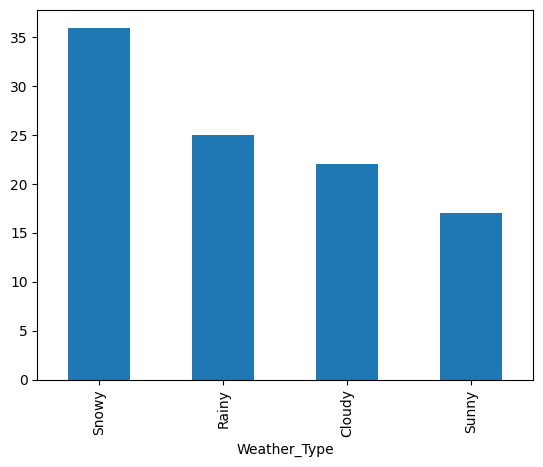

In [62]:
xnew["Weather_Type"].value_counts().plot(kind="bar")

In [63]:
xnew.to_csv("weather_results.csv", index=False)

# Step 9 - Save & Load

### Save

In [64]:
import joblib

joblib.dump(pre, "weather_pre.joblib")

['weather_pre.joblib']

In [65]:
model.save("weather_model.keras")

### Load

In [66]:
p = joblib.load("weather_pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [67]:
from tensorflow.keras.models import load_model

m = load_model("weather_model.keras")

In [68]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (13.00 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,218 (8.67 KB)

In [69]:
m.evaluate(xtest, ytest_pre)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8985 - loss: 0.2376


[0.23294885456562042, 0.8996211886405945]